In [238]:
# Plot options
import matplotlib.pyplot as plt

# Import required libraries
import numpy as np
import pyqtgraph as pg

# Import karabo libraries
import karabo_bridge as kb
import karabo_data as kd
import xfelmay2019 as tofoff


# Calibrate ToF spectra with Ne gas data from run 44

In [442]:
path='/gpfs/exfel/exp/SQS/201802/p002176/raw'

run = tofoff.runFormat( 44 )  
runData = kd.RunDirectory(path+run)
tofavg = tofoff.tofAverager( runData )

In [425]:
from scipy.signal import find_peaks_cwt
def findTOFPeaks( toftrace ):
    '''
    input:
        toftrace: use normalized tof trace generated from normalizedTOF, numpy array of floats
    output:
        peak_positions: returns indexes of the TOF peaks
        peak_values: returns height of TOF peaks
    Watthew Ware, 2019
    '''
    toftrace = np.abs(toftrace)
    base_width = 20.
    # Find indexes of inds
    zf = find_peaks_cwt(toftrace, [base_width])
    
    # Create averaging zones around peaks
    zguess = np.zeros_like(zf).astype(float) # allocate space

    for ii,zfi in enumerate(zf):
        xlow = (np.round( zfi - base_width/2. )).astype(int)
        if xlow < 0:
            xlow = 0
        xhigh = (np.round( zfi + base_width/2. )).astype(int)
        if xhigh > toftrace.size:
            xhigh = toftrace.size
            
        zguess[ii] = np.max(toftrace[xlow:xhigh])
        
    return zf, zguess

## Plot charge states 2->???

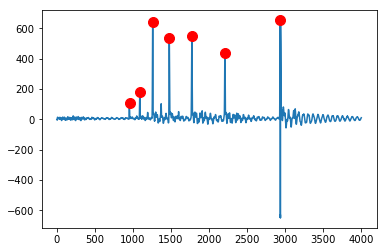

In [426]:
%matplotlib inline
#notebook 
#inline 
#plt.figure(figsize = (30,20))

#z  = tofoff.normalizedTOF( tofavg, downsampleRange=(260000,280000) )
#z = tofavg[260000:295000]    #[267000:271000]
z = tofavg[267000:271000]
zraw = np.copy(z)
thresh=80
# z[ z<thresh ] = 0.
zf,zguess = findTOFPeaks( z )

zf = zf[zguess > thresh]
zguess = zguess[zguess>thresh]

plt.plot(-z)
plt.plot(zf, zguess, 'o', ms=10, color='red')

# Use peaks to find fit

In [427]:
# zpeaks = zf[ (zf>3500) & (zf<8000) ]
zpeaks = zf
print(zpeaks)

[ 955 1090 1259 1478 1774 2208 2937]


In [428]:
zpeaks.size

7

Fit peaks

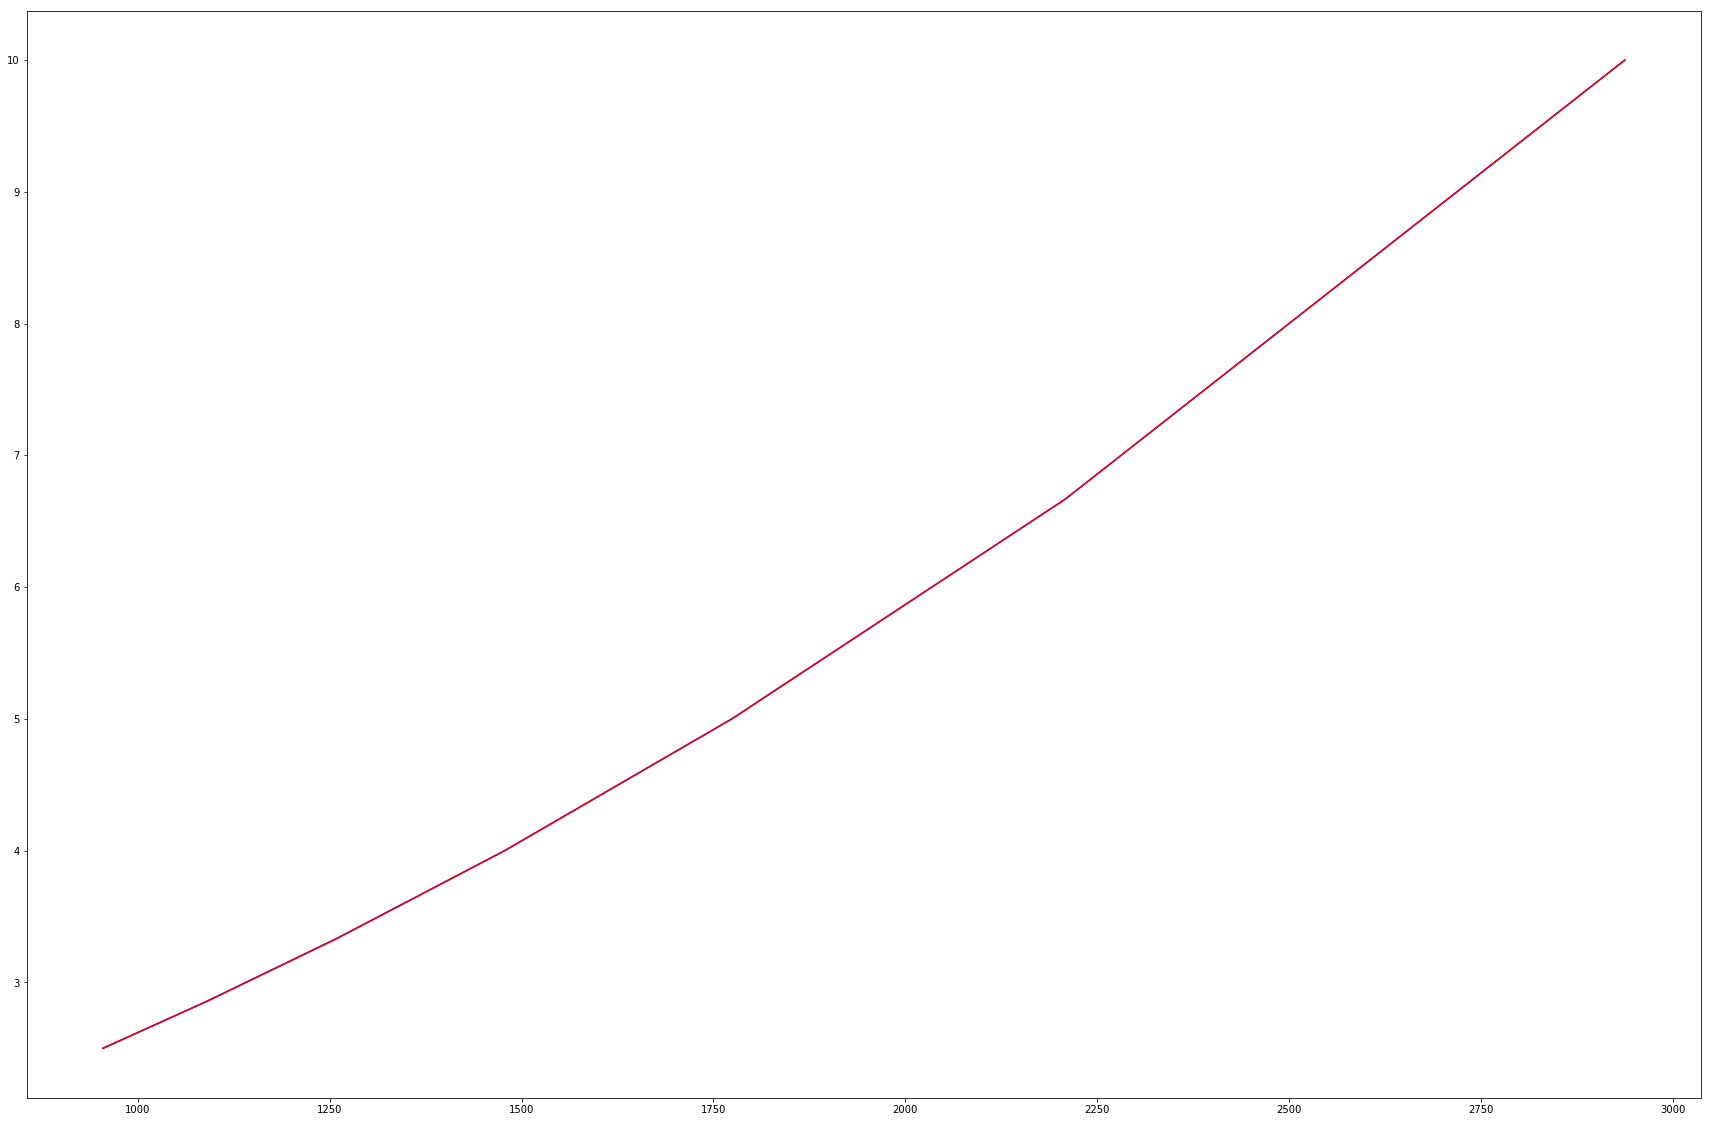

In [429]:
x = np.flip(zpeaks,0) 
#x = zpeaks

#m = 130.     #Xe 
m = 20.      #Ne
y = m/np.arange(2,zf.size+2).astype(float)

polyCoef = np.polyfit(x,y,2)


fitPoly = np.poly1d(polyCoef)

plt.figure(figsize = (30,20)) 
plt.plot( x,y, 'b' ) 
plt.plot( x,fitPoly(x), 'r' )


## Get the polynomial data

In [430]:
fitPoly

poly1d([6.29375114e-07, 1.33329119e-03, 6.54862070e-01])

## Plot calibrated TOF spectrum of Ne

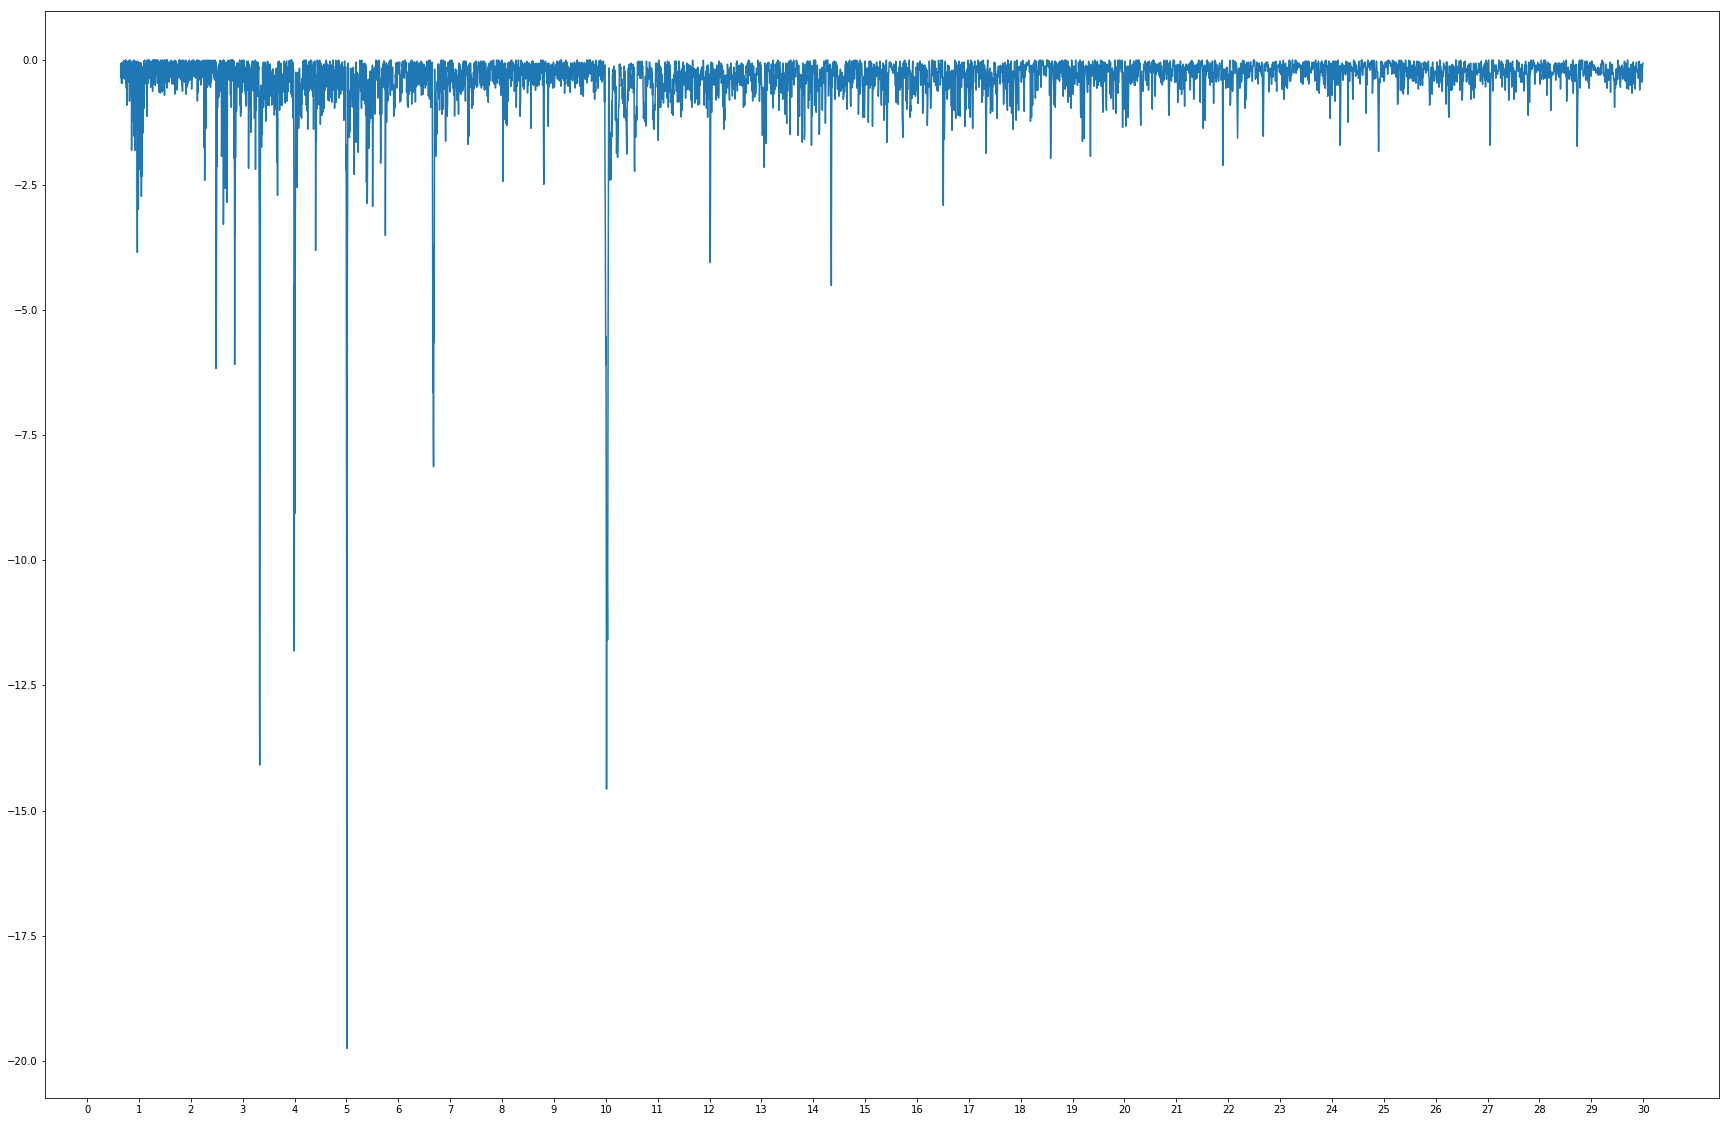

In [445]:
xs = np.arange( zraw.size )
mperq = fitPoly(xs)
minAt = np.argmin(mperq)

mperq = mperq[minAt:]  #[minAt:]
zcalib = -zraw[minAt:]

m=20
chargeNumber = 1./( mperq / m )
#chargeNumber =  mperq 

chargeCutoff = 30.
plt.figure(figsize = (30,20))
plt.plot( chargeNumber[chargeNumber < chargeCutoff], zcalib[chargeNumber < chargeCutoff] )
plt.xticks(np.arange(chargeCutoff+1.));
ax = plt.gca()
#ax.set_ylim(0,700)

In [353]:
#xs = np.arange( zraw.size )
#mperq = fitPoly(xs)
#minAt = np.argmin(mperq)
#minAt

0

# Plot calibrated TOF for Xe (run 30)

In [433]:
path='/gpfs/exfel/exp/SQS/201802/p002176/raw' #scratch/SampleData'         #raw'  ##'/gpfs/exfel/exp/SQS/201921/p002430/raw'

run = tofoff.runFormat( 30 ) 
runData = kd.RunDirectory(path+run)
tofavg = tofoff.tofAverager( runData )

In [365]:
from scipy.signal import find_peaks_cwt
def findTOFPeaks( toftrace ):
    '''
    input:
        toftrace: use normalized tof trace generated from normalizedTOF, numpy array of floats
    output:
        peak_positions: returns indexes of the TOF peaks
        peak_values: returns height of TOF peaks
    Watthew Ware, 2019
    '''
    toftrace = np.abs(toftrace)
    base_width = 20.
    # Find indexes of inds
    zf = find_peaks_cwt(toftrace, [base_width])
    
    # Create averaging zones around peaks
    zguess = np.zeros_like(zf).astype(float) # allocate space

    for ii,zfi in enumerate(zf):
        xlow = (np.round( zfi - base_width/2. )).astype(int)
        if xlow < 0:
            xlow = 0
        xhigh = (np.round( zfi + base_width/2. )).astype(int)
        if xhigh > toftrace.size:
            xhigh = toftrace.size
            
        zguess[ii] = np.max(toftrace[xlow:xhigh])
        
    return zf, zguess

<Figure size 2160x1440 with 0 Axes>

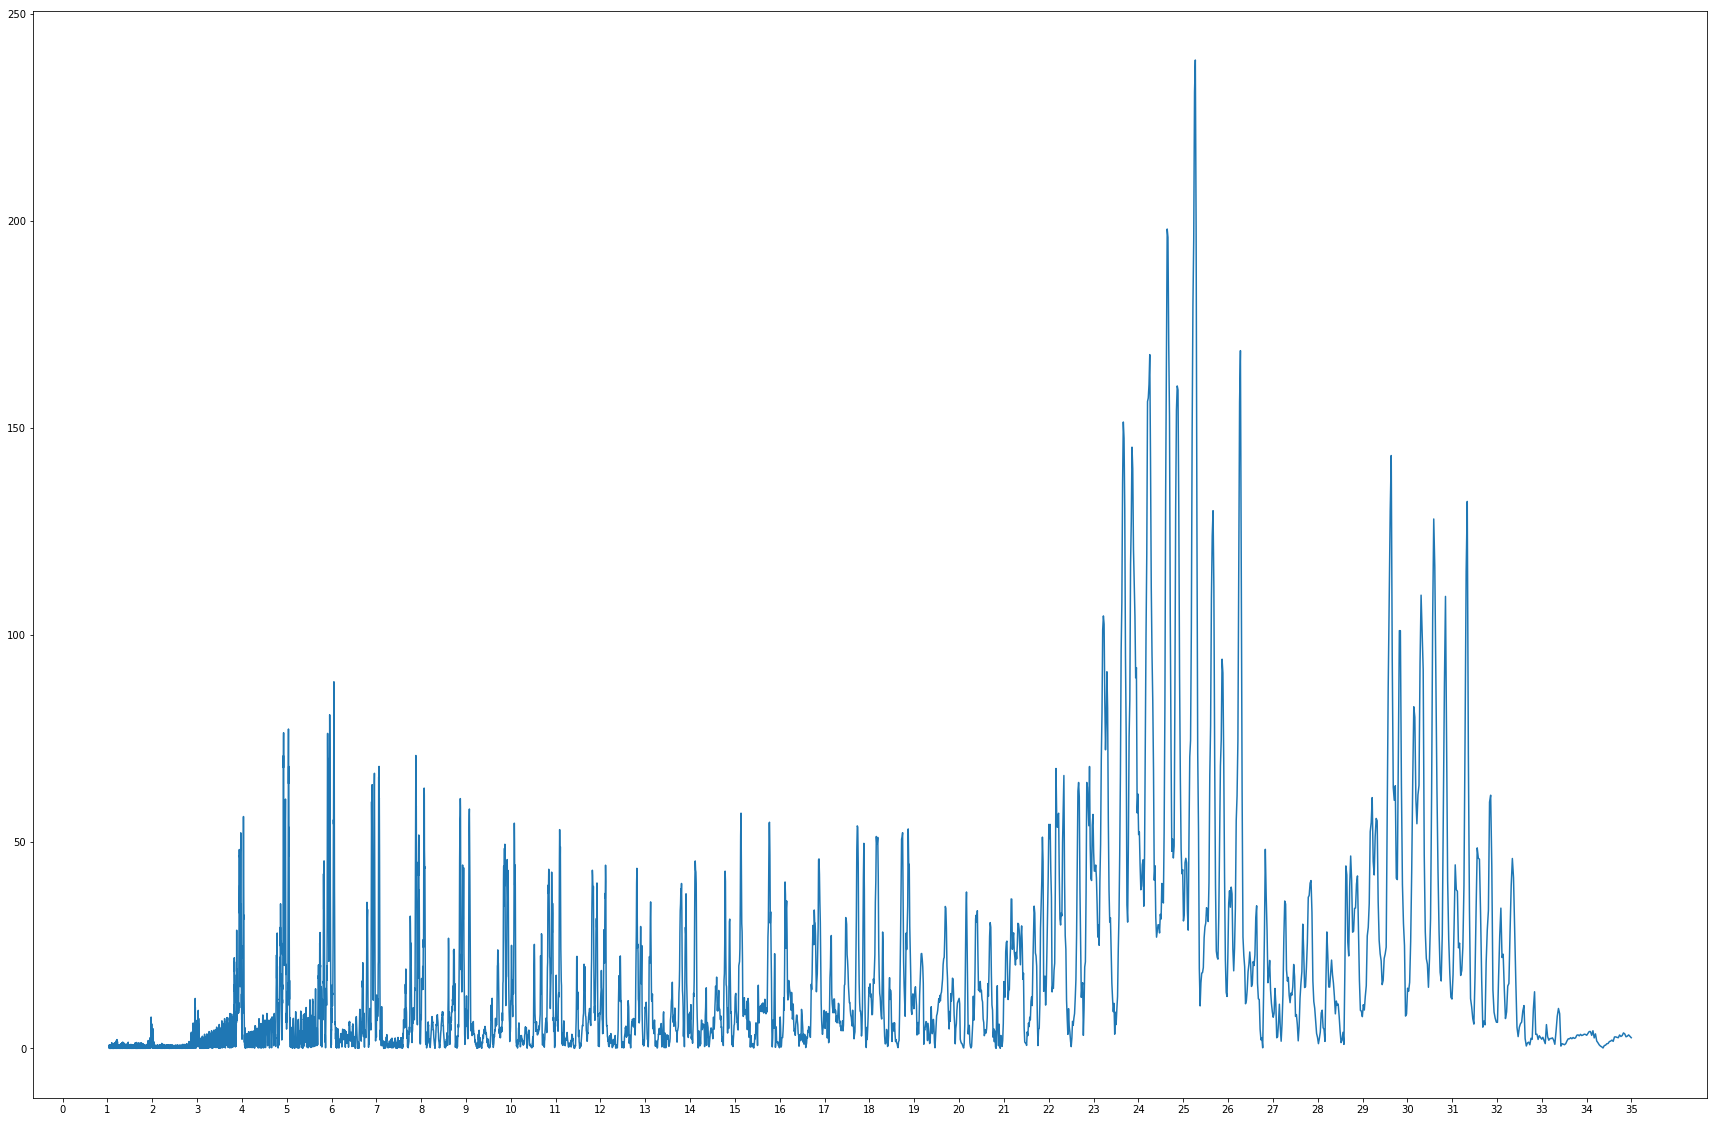

In [436]:
%matplotlib inline 
plt.figure(figsize = (30,20))

z  = tofoff.normalizedTOF( tofavg,downsampleRange=(267000,280000)  )  #  downsampleRange=(260000,280000)
zraw = np.copy(z)
# thresh=0.
# z[ z<thresh ] = 0.
# zf,zguess = findTOFPeaks( z )

# zf = zf[zguess > thresh]
# zguess = zguess[zguess>thresh]

xs = np.arange( zraw.size )
mperq = fitPoly(xs)
minAt = np.argmin(mperq)

mperq = mperq[minAt:]
zcalib = zraw[minAt:]
    
mXe = 130
chargeNumber =  1./( mperq / mXe )
    

chargeCutoff = 35.
plt.figure(figsize = (30,20))
plt.plot( chargeNumber[chargeNumber < chargeCutoff], zcalib[chargeNumber < chargeCutoff] )
plt.xticks(np.arange(chargeCutoff+1.));
# plt.plot(zf, zguess, 'o', ms=10, color='red')



# Plot calibrated TOF for Ne (run 127)

In [440]:
path='/gpfs/exfel/exp/SQS/201802/p002176/raw' #scratch/SampleData'         #raw'  ##'/gpfs/exfel/exp/SQS/201921/p002430/raw'

run = tofoff.runFormat( 127 ) 
runData = kd.RunDirectory(path+run)
tofavg = tofoff.tofAverager( runData )

<Figure size 2160x1440 with 0 Axes>

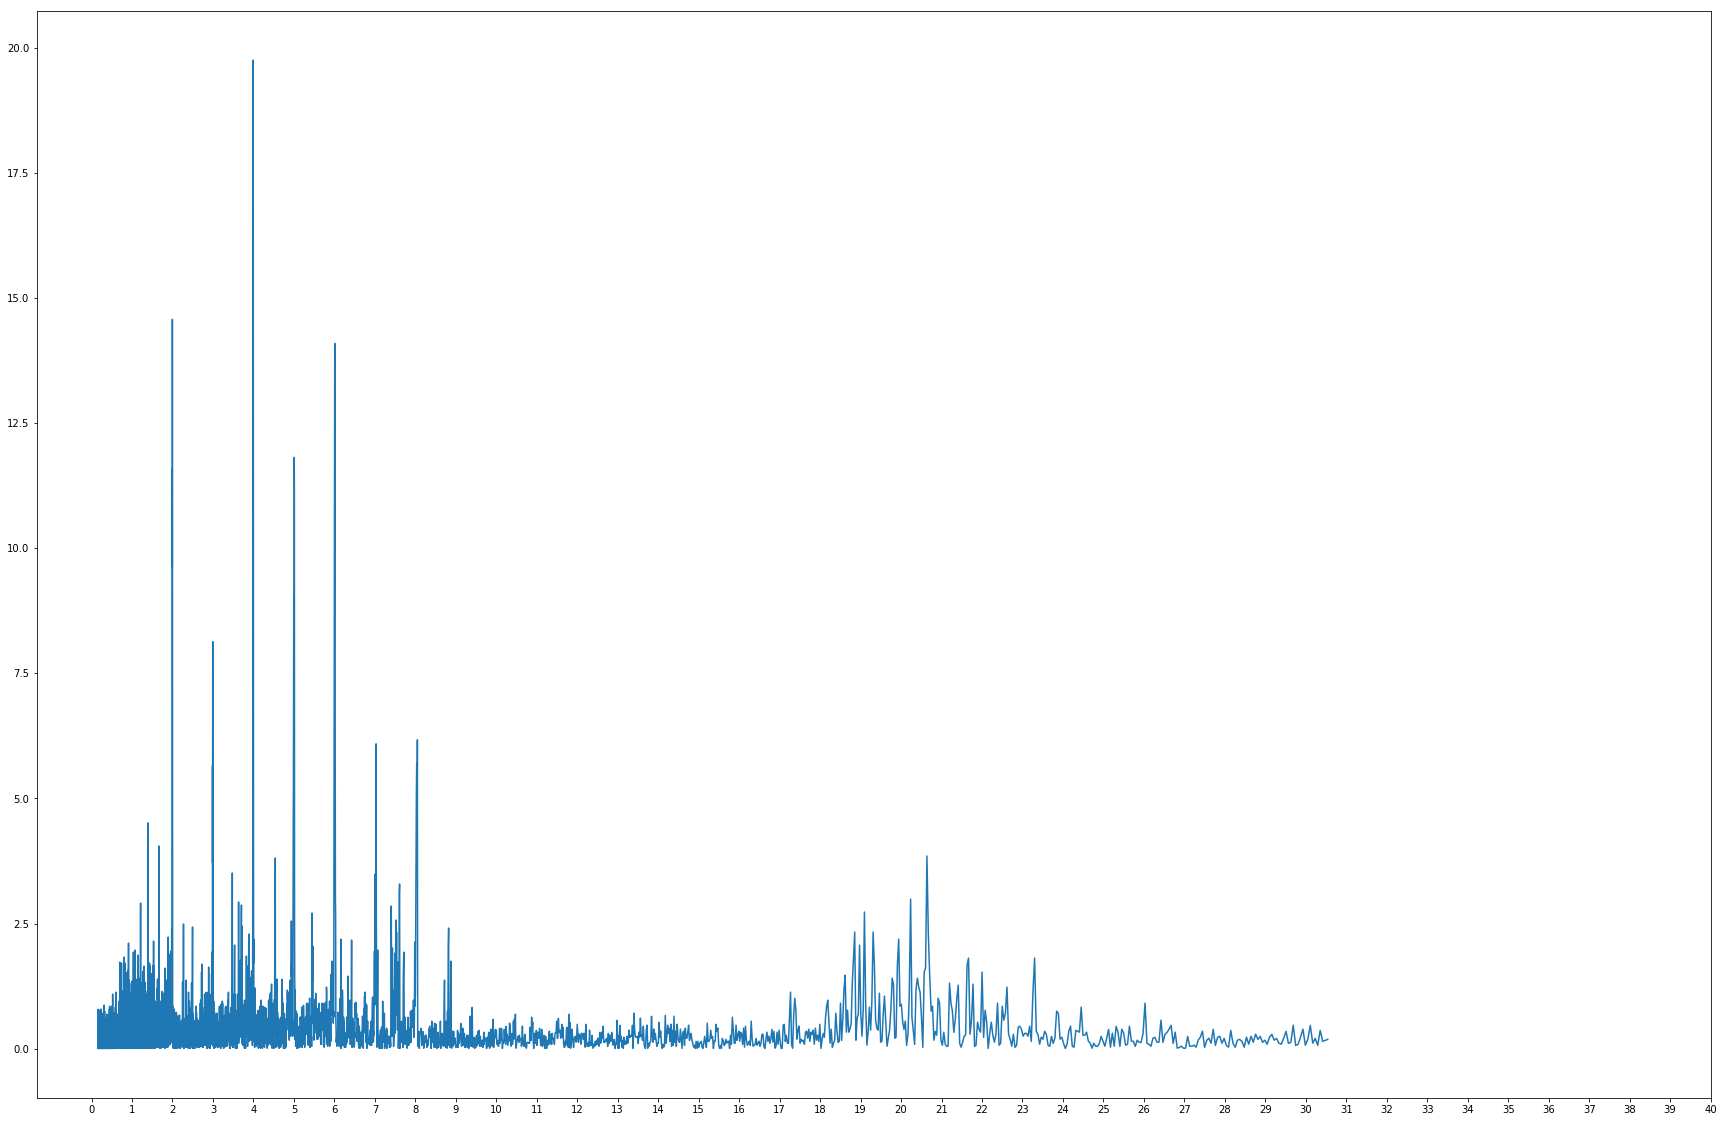

In [441]:
%matplotlib inline 
plt.figure(figsize = (30,20))

z  = tofoff.normalizedTOF( tofavg,downsampleRange=(267000,280000)  )  #  downsampleRange=(260000,280000)
zraw = np.copy(z)
# thresh=0.
# z[ z<thresh ] = 0.
# zf,zguess = findTOFPeaks( z )

# zf = zf[zguess > thresh]
# zguess = zguess[zguess>thresh]

xs = np.arange( zraw.size )
mperq = fitPoly(xs)
minAt = np.argmin(mperq)

mperq = mperq[minAt:]
zcalib = zraw[minAt:]
    
mNe = 20                              # Xe 130 Ne 20 CH4 16
chargeNumber =  1./( mperq / mNe )
    

chargeCutoff = 40.
plt.figure(figsize = (30,20))
plt.plot( chargeNumber[chargeNumber < chargeCutoff], zcalib[chargeNumber < chargeCutoff] )
plt.xticks(np.arange(chargeCutoff+1.));
# plt.plot(zf, zguess, 'o', ms=10, color='red')



# Plot calibrated TOF for Methane

In [466]:
path='/gpfs/exfel/exp/SQS/201802/p002176/raw' #scratch/SampleData'         #raw'  ##'/gpfs/exfel/exp/SQS/201921/p002430/raw'

run = tofoff.runFormat( 194 ) 
runData = kd.RunDirectory(path+run)
tofavg = tofoff.tofAverager( runData )

In [ ]:
path='/gpfs/exfel/exp/SQS/201802/p002176/raw' #scratch/SampleData'         #raw'  ##'/gpfs/exfel/exp/SQS/201921/p002430/raw'

run = tofoff.runFormat( 201 ) 
runData = kd.RunDirectory(path+run)
tofavg = tofoff.tofAverager( runData )

%matplotlib inline 
plt.figure(figsize = (30,20))

z  = tofoff.normalizedTOF( tofavg,downsampleRange=(267000,280000)  )  #  downsampleRange=(260000,280000)
zraw = np.copy(z)
# thresh=0.
# z[ z<thresh ] = 0.
# zf,zguess = findTOFPeaks( z )

# zf = zf[zguess > thresh]
# zguess = zguess[zguess>thresh]

xs = np.arange( zraw.size )
mperq = fitPoly(xs)
minAt = np.argmin(mperq)

mperq = mperq[minAt:]
zcalib = zraw[minAt:]
    
#mXe = 20                              # Xe 130 Ne 20 CH4 16
#chargeNumber =  1./( mperq / mXe )   

chargeCutoff = 50.
plt.figure(figsize = (30,20))
#plt.plot( chargeNumber[chargeNumber < chargeCutoff], zcalib[chargeNumber < chargeCutoff] )
plt.plot( mperq[mperq < chargeCutoff], zcalib[mperq < chargeCutoff] )
plt.title('Run ' + str(run) )
plt.xticks(np.arange(chargeCutoff+1.));
# plt.plot(zf, zguess, 'o', ms=10, color='red')

